In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\KINJAL KANJILAL\Desktop\churn prediction\Churn_Modelling.csv")

In [4]:
df.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [5]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5488,5489,15628155,Dike,410,France,Female,35,7,117183.74,1,1,1,109733.73,0
5327,5328,15641490,Windsor,850,Germany,Female,25,8,69385.17,2,1,0,87834.24,0
9137,9138,15583026,Welch,535,France,Female,38,0,135919.33,1,1,0,80425.65,0
9574,9575,15720123,Hudson,554,Spain,Male,37,3,0.00,2,1,0,166177.30,0
6985,6986,15586699,Thomson,825,France,Male,32,9,0.00,2,0,0,9751.03,0


In [6]:
df.drop('CustomerId',axis = 'columns',inplace = True)
df.drop('RowNumber',axis = 'columns',inplace = True)
df.drop('Surname',axis = 'columns',inplace = True)

In [7]:
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5501,631,France,Female,31,8,137687.72,1,1,0,190067.12,0
1135,733,Germany,Male,31,6,157791.07,2,0,0,177994.81,0


In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.CreditScore.values

array([619, 608, 502, ..., 709, 772, 792], dtype=int64)

In [10]:
df.EstimatedSalary.values

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [11]:
pd.to_numeric(df.CreditScore,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: CreditScore, Length: 10000, dtype: bool

In [12]:
df[pd.to_numeric(df.CreditScore,errors='coerce').isnull()]#hence no null values are present
# df.dropna

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [13]:
df[pd.to_numeric(df.Age	,errors='coerce').isnull()]#hence no null values are present

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [14]:
df[pd.to_numeric(df.Balance,errors='coerce').isnull()]#hence no null values are present

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [15]:
df.shape

(10000, 11)

In [16]:
# df = df.dropna

In [17]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1455,686,Germany,Male,35,2,109342.82,2,0,1,86043.27,0
7713,793,France,Male,56,8,119496.25,2,1,0,29880.99,0
9520,727,Germany,Female,18,2,93816.70,2,1,0,126172.11,0
7534,808,France,Male,32,1,0.00,2,1,1,46200.71,0
4413,615,Germany,Male,39,5,113193.51,2,1,1,52166.25,0


In [18]:
tenure_churn_no = df[df.Exited==1].Tenure
tenure_churn_yes = df[df.Exited==0].Tenure

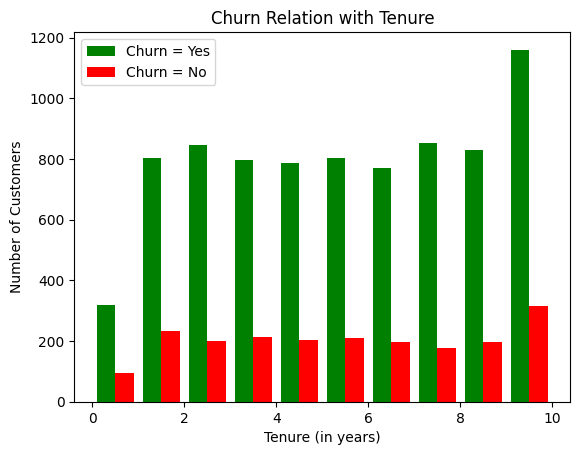

In [19]:
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.xlabel('Tenure (in years)')
plt.ylabel('Number of Customers')
plt.title('Churn Relation with Tenure')
plt.legend()
# plt.show()

In [20]:
age_churn_no = df[df.Exited==1].Age
age_churn_yes = df[df.Exited==0].Age

Text(0.5, 1.0, 'age customer relation')

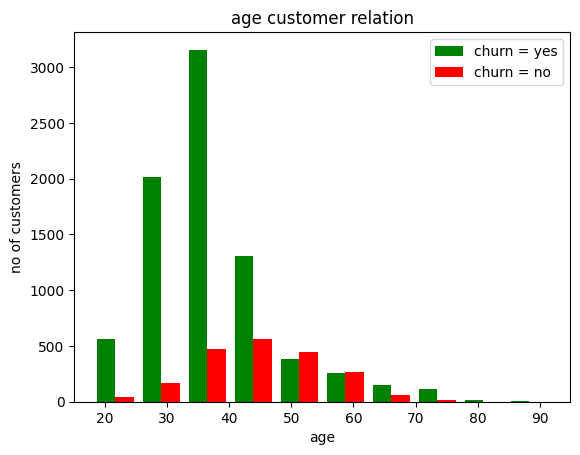

In [21]:
plt.hist([age_churn_yes,age_churn_no],color=['green','red'],label=['churn = yes','churn = no'])
plt.legend()
plt.xlabel('age')
plt.ylabel('no of customers')
plt.title('age customer relation')

In [22]:
cs_churn_yes = df[df.Exited==0].CreditScore	
cs_churn_no = df[df.Exited==1].CreditScore	

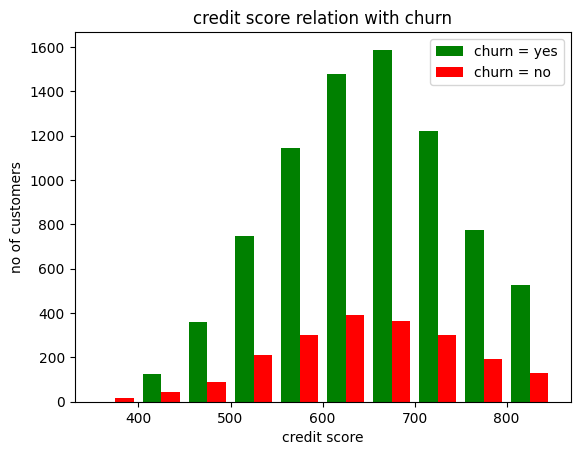

In [23]:
plt.hist([cs_churn_yes,cs_churn_no],color =['green','red'],label=['churn = yes','churn = no'])
plt.legend()
plt.title('credit score relation with churn')
plt.xlabel('credit score')
plt.ylabel('no of customers')
plt.show()

In [24]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [25]:
print_unique_col_values(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [26]:
# df.replace('france','spain',inplace=True)

In [57]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [28]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1942,684,France,1,45,6,148071.39,1,1,0,183575.01,0
708,580,France,0,35,8,0.00,2,0,1,10357.03,0
9215,584,Germany,0,37,10,134171.80,4,1,1,70927.11,1
6622,559,France,0,43,1,0.00,1,0,1,86634.30,0
6094,589,France,0,31,10,110635.32,1,1,0,148218.86,0


In [29]:
print_unique_col_values(df)

Geography : ['France' 'Spain' 'Germany']


In [30]:
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# Geography_encoded = encoder.fit_transform(df[['Geography']])
# print(Geography_encoded)
# # df['Geography']=Geography_encoded
# scaler = MinMaxScaler()
# encoder = OneHotEncoder(sparse_output = False)

In [31]:
df1 = pd.get_dummies(data = df,columns=['Geography'])

In [32]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4904,741,0,44,7,0.00,2,1,1,190534.76,0,True,False,False
9544,648,0,37,7,138503.51,2,1,0,57215.85,0,False,True,False
5744,749,0,43,1,124209.02,1,1,1,167179.48,0,False,False,True
3870,630,1,40,8,0.00,2,1,1,42495.81,0,True,False,False
2259,686,0,41,4,129553.76,2,1,0,187599.80,0,True,False,False


In [33]:
df1[['Geography_France','Geography_Germany','Geography_Spain']] = df1[['Geography_France','Geography_Germany','Geography_Spain']].astype(int)
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [59]:
print_unique_col_values(df1)

In [35]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int32
Geography_Germany      int32
Geography_Spain        int32
dtype: object

In [36]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale =['Balance','EstimatedSalary','CreditScore','Age','Tenure','NumOfProducts']
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [37]:
df1.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4982,0.530,1,0.162162,0.7,0.000000,0.333333,1,1,0.781751,0,1,0,0
3227,0.682,1,0.108108,0.9,0.544537,0.000000,1,0,0.766155,0,1,0,0
5809,1.000,1,0.189189,0.4,0.000000,0.000000,1,1,0.903138,0,1,0,0


In [38]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [39]:
x = df1.drop('Exited',axis ='columns')
y = df1['Exited']

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
x_train.shape

(8000, 12)

In [42]:
x_test.shape

(2000, 12)

In [43]:
y_test.shape

(2000,)

In [44]:
x_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,0.672,1,0.189189,0.6,0.000000,0.333333,1,1,0.895494,1,0,0
1561,0.564,1,0.324324,0.4,0.476786,0.333333,1,1,0.979930,0,1,0
1670,0.418,1,0.081081,0.3,0.457317,0.000000,1,0,0.429438,0,0,1
6087,0.422,0,0.121622,0.9,0.540606,0.000000,1,0,0.765417,1,0,0
6669,0.334,1,0.513514,0.9,0.566554,0.000000,0,0,0.197401,1,0,0
5933,0.438,1,0.310811,0.4,0.479252,0.000000,1,0,0.815770,1,0,0
8829,0.666,0,0.297297,0.1,0.000000,0.333333,0,0,0.378788,1,0,0
7945,0.818,0,0.364865,0.8,0.000000,0.333333,1,1,0.496246,1,0,0
3508,0.152,0,0.216216,0.3,0.000000,0.333333,1,1,0.306125,1,0,0
2002,0.502,1,0.756757,0.2,0.000000,0.333333,0,1,0.257740,1,0,0


In [45]:
y_train[:10]

9254    0
1561    0
1670    1
6087    1
6669    1
5933    1
8829    0
7945    0
3508    0
2002    0
Name: Exited, dtype: int64

In [46]:
len(x_train.columns)

12

In [47]:
import tensorflow as tf
from tensorflow import keras

In [48]:
model = keras.Sequential([keras.layers.Dense(10,input_shape=(12,),activation ='relu'),
                          keras.layers.Dense(5,activation='tanh'),
                          keras.layers.Dense(1,activation='sigmoid'),])
model.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100


C:\Users\KINJAL KANJILAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.7918 - loss: 0.5530
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.7954 - loss: 0.4753
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.8035 - loss: 0.4553
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.8039 - loss: 0.4507
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8113 - loss: 0.4407
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.8093 - loss: 0.4353
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.8151 - loss: 0.4302
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.8203 - loss: 0.4184
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.8200 - loss: 0.4161
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.8248 - loss: 0.4038
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8200 - loss: 0.4094
Epoch 12/100
250/250 ━━━━━━━━━━

In [49]:
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.8614 - loss: 0.3387 


[0.3387638032436371, 0.862500011920929]

In [50]:
yp = model.predict(x_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step


array([[0.03920449],
       [0.0213516 ],
       [0.18712823],
       [0.08358797],
       [0.04937422]], dtype=float32)

In [51]:
y_test[:5]

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64

In [52]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [53]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [54]:
from sklearn.metrics import confusion_matrix,classification_report

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(95.72222222222221, 0.5, 'true value')

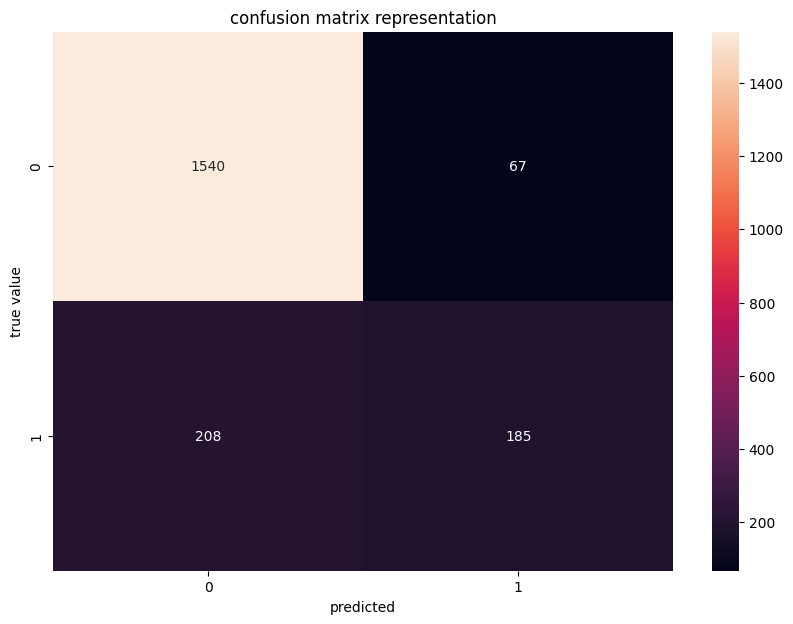

In [65]:
import seaborn as sns
cm  = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.title('confusion matrix representation')
plt.xlabel('predicted')
plt.ylabel('true value')

In [77]:
import pickle
file_name = 'ann_churn.pkl'
pickle.dump(model,open(file_name,'wb'))

In [76]:
model1 = pickle.load(open(file_name,'rb'))